<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/Hands-On-Machine-Learning-with-Scikit-Learn-and-TensorFlow-Book/Chapter2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End-To-End ML project**

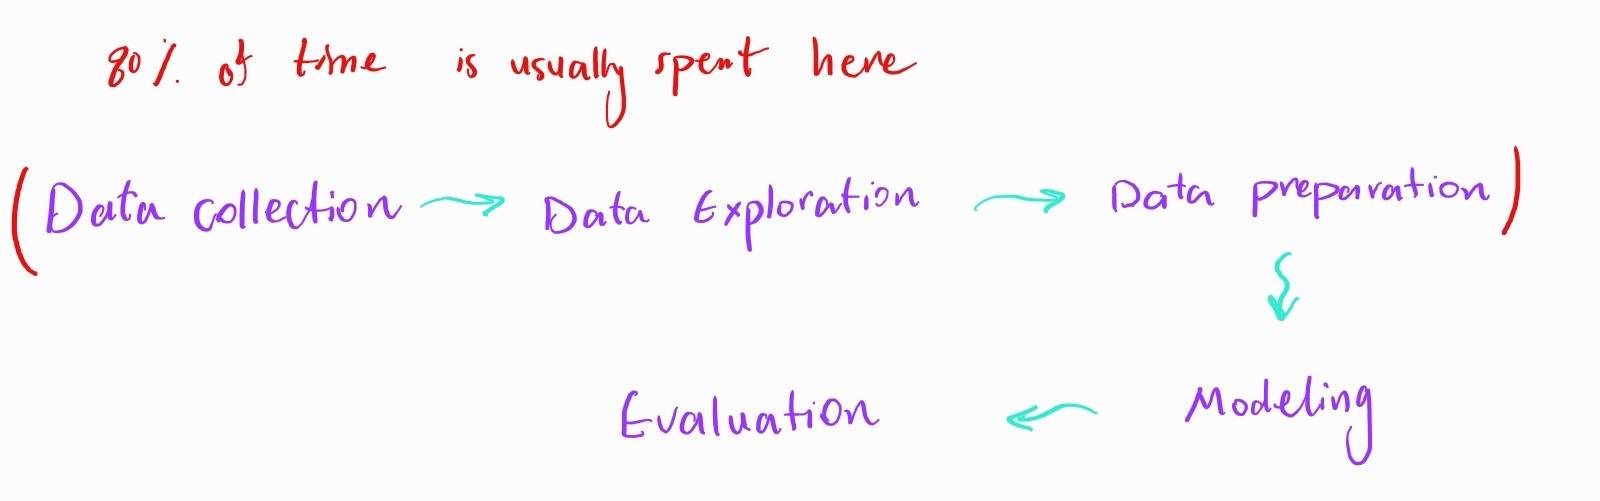

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [150]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


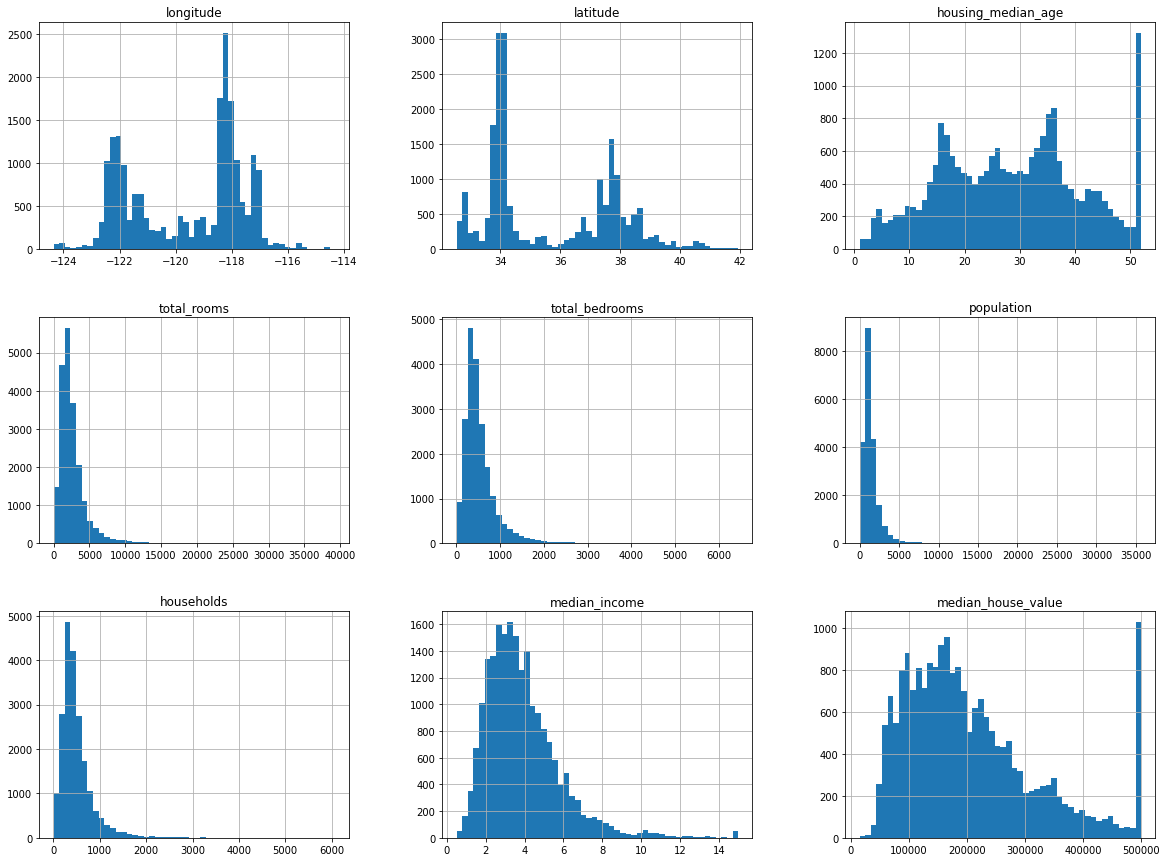

In [151]:
housing.hist(figsize=(20,15),bins=50)
plt.show()

**Split train and test data**

In [152]:
def split_train_test(data=housing,test_ratio=0.2):
  np.random.seed(11)
  shuffled_indices = np.random.permutation(len(data))
  test_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_size]
  train_indices = shuffled_indices[test_size:]
  return(train_indices,test_indices)
split_train_test()

(array([20025, 10772, 16691, ...,  7259,  3775, 10137]),
 array([ 2734,  9087, 15789, ...,  6901,  5879,  7930]))

In [153]:
# we use hash to make an identifier for each instance in our dataset, since we dont have an identifier column. 
# remember that the ultimate goal here is to just use  one portion of our data as test. so we want to make it unique. 
import hashlib
def test_set_check(identifier, test_ratio):
  m_ = hashlib.sha256()
  m_.update(identifier)
  return(m_.digest()[-1] < 256 * test_ratio)

In [154]:
# we make an identifier coloumn by adding an index column 

def split_train_test(test_ratio,data):
  data_ = data.reset_index()
  test_indices = []
  train_indices = []
  for i in range(len(data)):
    if test_set_check(data_['index'][i],test_ratio) == True:
      test_indices.append(i)
    else:
      train_indices.append(i)
  return(data.iloc[train_indices], data.iloc[test_indices])

In [155]:
split_train_test(0.2,housing)

(       longitude  latitude  ...  median_house_value  ocean_proximity
 0        -122.23     37.88  ...            452600.0         NEAR BAY
 1        -122.22     37.86  ...            358500.0         NEAR BAY
 2        -122.24     37.85  ...            352100.0         NEAR BAY
 3        -122.25     37.85  ...            341300.0         NEAR BAY
 4        -122.25     37.85  ...            342200.0         NEAR BAY
 ...          ...       ...  ...                 ...              ...
 20635    -121.09     39.48  ...             78100.0           INLAND
 20636    -121.21     39.49  ...             77100.0           INLAND
 20637    -121.22     39.43  ...             92300.0           INLAND
 20638    -121.32     39.43  ...             84700.0           INLAND
 20639    -121.24     39.37  ...             89400.0           INLAND
 
 [16493 rows x 10 columns],
        longitude  latitude  ...  median_house_value  ocean_proximity
 6        -122.25     37.84  ...            299200.0        

In [156]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size= 0.2 ,random_state = 42)

**Stratified sampling**

In [157]:
# we reduce down the median income into 5 categories
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(np.ceil(housing['median_income'] / 1.5) <= 5, 5, inplace = True)
housing['income_cat']

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [158]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)

for train_index, test_index in sss.split(housing,housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [159]:
#lets check and see if the ratio of stratified samples are consistent with the whole dataset
#first the whole dataset
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [160]:
#now the stratified test set
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [161]:
#and now the purely random test set
test_set['income_cat'] = np.ceil(test_set['median_income']/ 1.5)
test_set['income_cat'].where(np.ceil(test_set['median_income'] / 1.5) <= 5, 5, inplace= True)
test_set['income_cat'].value_counts()/len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [162]:
#Or just use:
test_set['income_cat'].value_counts(normalize=True)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

OR we can just simply use 'stratify=' in train_test_split 

In [163]:
housing = pd.read_csv('housing.csv')
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(np.ceil(housing['median_income'] / 1.5) <= 5, 5, inplace = True)

xx = housing.drop(['median_house_value'],axis=1)
yy = housing['median_house_value']

x_tr,x_ts,y_tr,y_ts = train_test_split(xx,yy, stratify=housing['income_cat'])
x_tr['income_cat'].value_counts(normalize=True)

3.0    0.350581
2.0    0.318863
4.0    0.176292
5.0    0.114470
1.0    0.039793
Name: income_cat, dtype: float64

**Now that we are done with generating test set, we delete 'income_cat' and move on to the next stage which is exploring data**

In [164]:
for set in (strat_test_set,strat_train_set):
  set.drop(['income_cat'],axis=1, inplace=True)

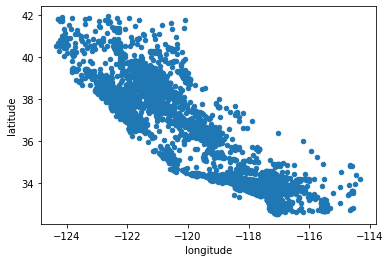

In [165]:
#first, we make a copy
housing = strat_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude')

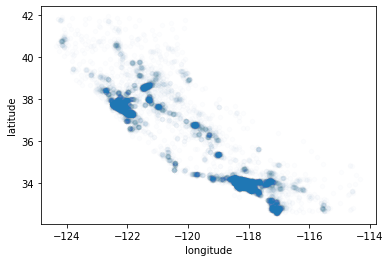

In [166]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.01)

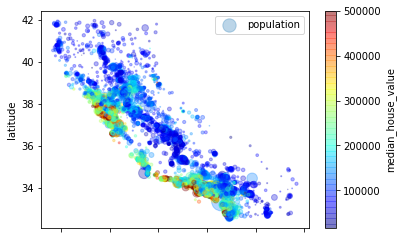

In [167]:
housing.plot(kind='scatter', x='longitude', y='latitude', s=housing['population']/100,
             c='median_house_value',cmap=plt.get_cmap('jet'),label='population', alpha=0.3, colorbar=True)
plt.legend()

**Two ways to show correlations:**


1.   .corr()
2.   pandas scatter_matrix



In [168]:
#finding correlations between each pair
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc84a641510>,
      dtype=object)

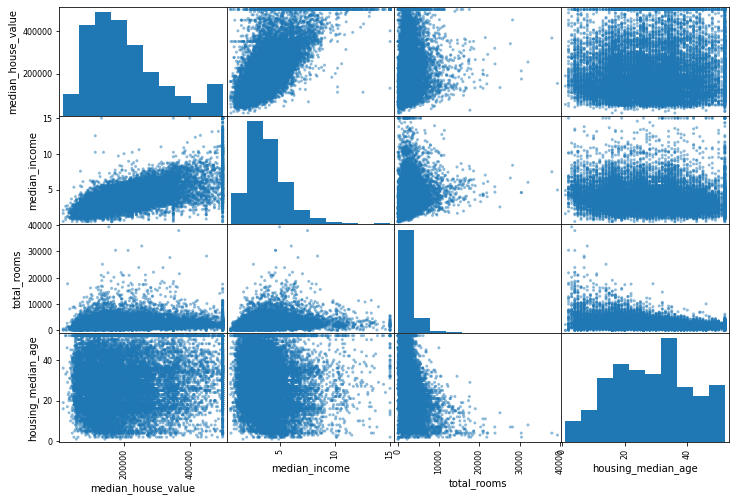

In [169]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))

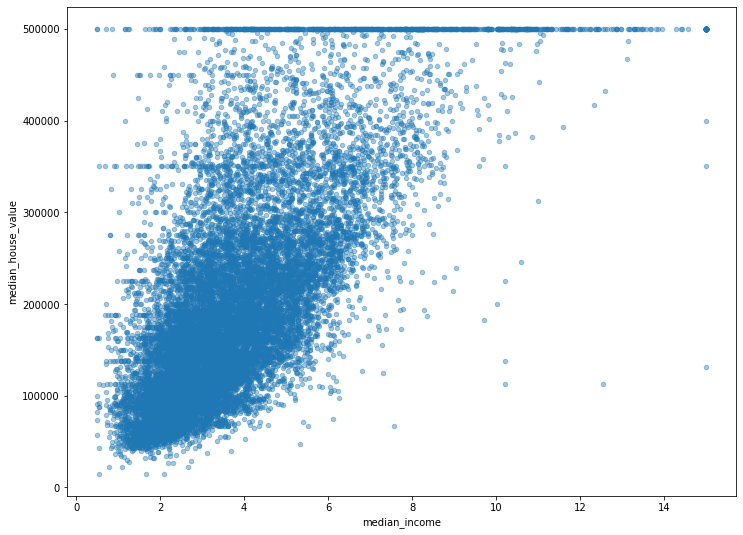

In [170]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',alpha=0.4, figsize=(12,9))

In [171]:
#we make some other interesting attributes
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [172]:
housing = strat_train_set.drop(['median_house_value'],axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

**Data Cleaning**

drop()

dropna()

fillna()

In [173]:
housing.dropna(subset=['total_bedrooms']) #option 1
housing.drop(['total_bedrooms'], axis=1) #option 2
total_bedrooms_median = housing['total_bedrooms'].median() # we need to save this to use it later to fill the missing vales in our test set as well
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median()) #option 3

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

**For data cleaning we can also use scikitlearn imputer**

In [174]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop(['ocean_proximity'],axis=1) 
imputer.fit(housing_num)
print(imputer.statistics_)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.describe()

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


**Dealing with categorical data**

In [175]:
#option 1: LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = encoder.fit_transform(housing['ocean_proximity'])
housing_full = pd.DataFrame(X)
housing_full.columns=['ocean proximity']
print(encoder.classes_)
X
# housing['ocean_proximity'] = housing_full
# housing

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([1, 4, 1, ..., 0, 0, 1])

In [176]:
#option 2: OneHotEncoder
#OneHotEncoder takes 2-D arrays as opposed to LabelEncoder which takes 1-D arrays
housing_cat = housing['ocean_proximity']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(X.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [177]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])


**LabelBinarizer = LabelEncoder + OneHotEncoder**

In [178]:
from sklearn.preprocessing import LabelBinarizer
encoder  = LabelBinarizer(sparse_output=True)
qaa=encoder.fit_transform(housing_cat)
qaa.toarray()

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

**As with all the transformations, it is important to fit the scalers to the training data only.**

**Custom Transformers:**

In [179]:
# we make a custom transformer to see if it is better to add the attribute "bedrooms per rooms"
from sklearn.base import BaseEstimator , TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room #we just add our hyperparameter(s) here
  def fit(self, X, y=None):
    return(self) #fit just returns self
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return(np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room])
    else:
      return(np.c_[X, rooms_per_household, population_per_household])

In [180]:
#pipeline for numerical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(steps=[('imputer',imputer),
                               ('attribts_adder',CombinedAttributesAdder()),
                               ('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [181]:
#full pipeline using FeatureUnion

class DataFrameSelector(BaseEstimator,TransformerMixin): #since scikit-learn cant handle pandas dataframes,we make this class
  def __init__(self,attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return(self)
  def transform(self, X):
    return(X[self.attribute_names].values)

from sklearn.pipeline import FeatureUnion

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

num_pipeline = Pipeline([('selector',DataFrameSelector(num_attr)),
                             ('imputer',imputer),
                               ('attribts_adder',CombinedAttributesAdder()),
                               ('std_scaler',StandardScaler())])

cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attr)),
                               ('one_hot_encoder',OneHotEncoder(sparse=False))])

full_pipeline = FeatureUnion(transformer_list=[('num_pip',num_pipeline),('cat_pip',cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared
housing_prepared.shape

(16512, 16)

**Select and Train a model**

In [182]:
from sklearn.linear_model import LinearRegression

my_linear_model = LinearRegression()
my_linear_model.fit(housing_prepared ,housing_labels)
#we dont want to touch the test data, so we evaluate the prediction of our model here on training data
pred = my_linear_model.predict(housing_prepared)

In [183]:
from sklearn.metrics import mean_squared_error
q= mean_squared_error(housing_labels, pred)
np.sqrt(q)

68627.87390018745

In [184]:
from sklearn.tree import DecisionTreeRegressor
my_tree = DecisionTreeRegressor()
my_tree.fit(housing_prepared, housing_labels)
pred = my_tree.predict(housing_prepared)

q = mean_squared_error(housing_labels, pred)
np.sqrt(q)

0.0

**As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation.**

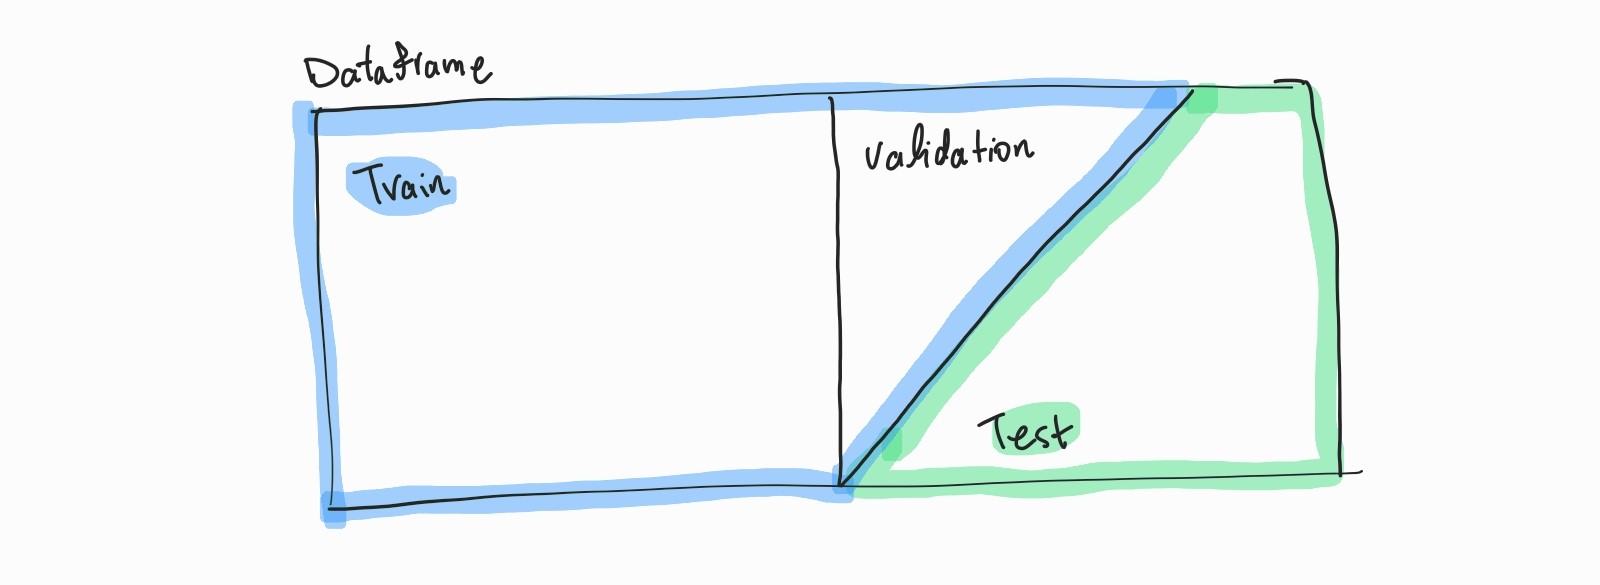

we can use sklearn to split the training dataset into train and validation. but we can also use K-fold cross-validation:


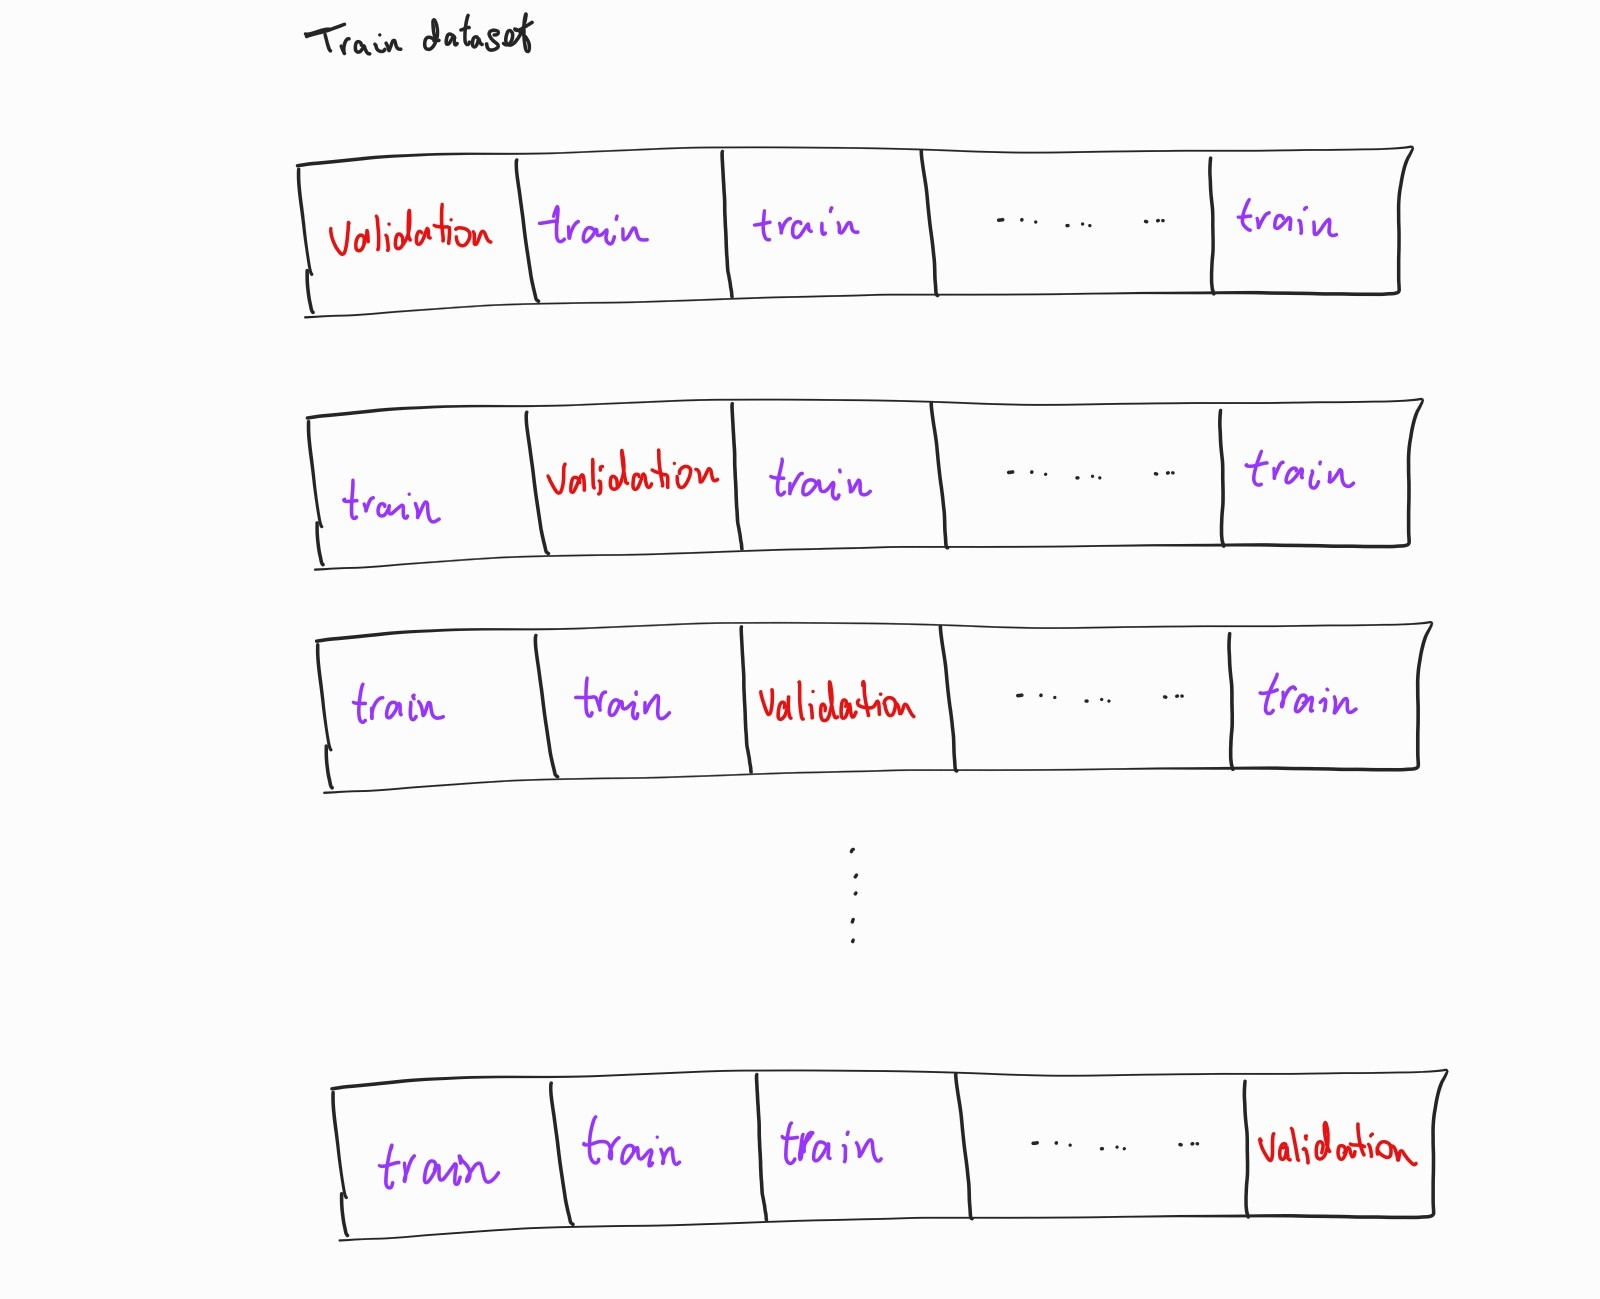

In [200]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(my_tree, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv= 10)
print(np.sqrt(-tree_scores).mean())

def display_scores_tree(scr=np.sqrt(-tree_scores)):
  print(f"Scores:{scr}")
  print(f"Mean:{scr.mean()}")
  print(f"Standard Deviation:{scr.std()}")

display_scores_tree()

71739.91400954779
Scores:[72952.4596247  70424.88069212 68130.18947156 72396.3469697
 71256.31221048 77807.39230828 70628.09130372 73887.88296208
 67804.57579519 72111.00875766]
Mean:71739.91400954779
Standard Deviation:2741.9569124156646


In [206]:
lin_scores = cross_val_score(my_linear_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
print(np.sqrt(-lin_scores).mean())

def display_scores_linear(scr=np.sqrt(-lin_scores)):
  print(f"Scores:{scr}")
  print(f"Mean:{scr.mean()}")
  print(f"Standard Deviation:{scr.std()}")

display_scores_linear()

69104.07998247063
Scores:[71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:69104.07998247063
Standard Deviation:2880.3282098180607
